# Predicting Fake News 

## Dataset: Datacamp dataset for fake news challenge 
## URL : https://s3.amazonaws.com/assets.datacamp.com/blog_assets/fake_or_real_news.csv

### Goal:  
News provide us with the necessary information that helps make important decision be it as simple as deciding which fruit to buy. In politics, news is the only way to convince public for demanding any vote as it decided the future of any country. A fake news can create confusion in public and thus affect their votes. Hence detecting fake news has been a topic since many years and data scientists are striving to build models on detecting fake news. In this notebook, I have tried my hands on the textual data of news that is already labelled as FAKE or REAL. It has been trained on 66% and tested on 34% of the data for validating the results applied on models. Multiple techniques gave varying results on above data and the techniques used is listed as follows.

### Outline: 
This notebook contains various experiments with the data using machine learning and deep learning algorithms to explore the fake news data. Descriptions have been provided with them in accordance with the implementation.  

### Data Processing Techniques: 
### 1. Count Vectorizer : Converts text into a matrix of token counts
### 2. Tf-Idf Vectorizer : Converts text into a matrix of TF-IDF features.
### 3. Hashing Vectorizer : Converts text into a scipy.sparse matrix holding token occurrence counts (or binary occurrence information), possibly normalized as token frequencies

### Models: 
### 1. MultinomialNB
### 2. Passive Aggressive Classifier
### 3. Sequential model using Keras, CNNs

In [39]:
import pandas as pd
import numpy as np
df = pd.read_csv("C:\\Users\\Prajakta\\fake_or_real_news.csv")
df.head(5)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [40]:
df_news = df
df_news.head(5)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [41]:
df_news = df_news.set_index("Unnamed: 0") 

In [42]:
df_news.head(5)

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


#### Set target label to y

In [43]:
y = df_news.label

In [44]:
df_news.drop("label", axis=1)

,title,text
Unnamed: 0,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello..."
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T..."
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...
6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ..."
7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o..."
95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...
4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...


#### Train-Test split using cross-validation : X contains all the text i.e. news data and y contains the label to be predicted
#### Train Data - 66%
#### Test Data - 34%

In [45]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_news['text'], y, test_size=0.33, random_state=53)

#### Description:

To get a good idea if the words and tokens in the articles had a significant impact on whether the news was fake or real, I began by using CountVectorizer and TfidfVectorizer.

For example, if the function has a max threshhold set at .7 for the TF-IDF vectorizer tfidf_vectorizer using the max_df argument. This removes words which appear in more than 70% of the articles. Also, the built-in stop_words parameter will remove English stop words from the data before making vectors.

There are many more parameters available to experiment with in the scikit-learn documentation for TfidfVectorizer and CountVectorizer.

### A. Count vectorizer method 

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english') 

In [47]:
count_train = count_vectorizer.fit_transform(X_train) 

In [48]:
count_test = count_vectorizer.transform(X_test)

### B. Tf-Idf vectorizer method 

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 

In [50]:
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

In [51]:
tfidf_test = tfidf_vectorizer.transform(X_test)

In [52]:
print(tfidf_vectorizer.get_feature_names()[-10:])

['حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']


In [53]:
print(count_vectorizer.get_feature_names()[:10])

['00', '000', '0000', '00000031', '000035', '00006', '0001', '0001pt', '000ft', '000km']


### Confusion Matrix

It describes the performance of a model and hence I used it here to compare my model's Actual vs Predicted results on the data.

In [60]:
import itertools   
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Multinomial Naive Bayes classifier: 
It is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

#### Running the model over tfidf scores and countvectorizer scores to compare the results

In [61]:
from sklearn.naive_bayes import MultinomialNB 
clf = MultinomialNB() 

accuracy:   0.857
Confusion matrix, without normalization


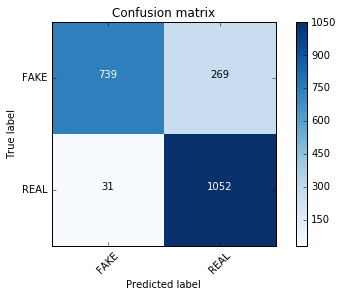

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import metrics
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])




#### Here, 
#### True Positives (TP): Number of examples that model correctly predicted news is fake = 1052       
#### True Negatives (TN):  Number of examples that model correctly predicted news is not fake = 739
#### False Positives (FP): Number of examples that model incorrectly predicted that news is real = 269        
#### False Negatives (FN): Number of examples that model incorrectly predicted that news is not real = 31

#### The model gives an accuracy of 85.7% using Tf-Idf score which is good. 

In [63]:
clf = MultinomialNB() 

accuracy:   0.893
Confusion matrix, without normalization


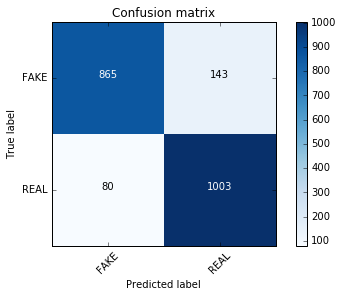

In [64]:
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

#### The model gives an accuracy of 89.3% using Count vectorize scores which outperforms the Tf-idf scores in this case. 
This is simply because Count vectorizer uses simple word frequency whereas Tf-idf vectorizer uses normalized value that increases proportionally to count, but is offset by the frequency of the word in the corpus. - This is the IDF (inverse document frequency part).This helps to adjust for the fact that some words appear more frequently. We can say that Tf-idf results can be relied where unique words are taken into consideration in the data. 

### Parameter Tuning with MultinomialNB

#### Parameter alpha in MultinomialNB is a hyperparameter used for smoothing and below are the experimentation results with the accuracy score while varying alpha 

In [65]:
clf = MultinomialNB(alpha=0.1)

In [66]:
last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

Alpha: 0.00 Score: 0.61502
Alpha: 0.10 Score: 0.89766
Alpha: 0.20 Score: 0.89383
Alpha: 0.30 Score: 0.89000
Alpha: 0.40 Score: 0.88570
Alpha: 0.50 Score: 0.88427
Alpha: 0.60 Score: 0.87470
Alpha: 0.70 Score: 0.87040
Alpha: 0.80 Score: 0.86609
Alpha: 0.90 Score: 0.85892


#### Since parameter tuning does not seem to give outstandingly different results than default, some other classifiers can be used to check whether accuracy can be improved. 

#### The passive-aggressive algorithms are a family of algorithms for large-scale learning. They are similar to the Perceptron in that they do not require a learning rate. The parameter n_iter gives number of passes over the training data (aka epochs).

In [67]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(n_iter=50)

accuracy:   0.937
Confusion matrix, without normalization


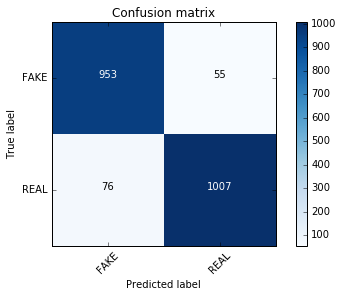

In [68]:
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

#### This model uses tf-idf scores and gives a maximum accuracy of 93.7% which is better than MultinomialNB results.

#### After knowing the performance of models, we can retrieve the most informative features that helped in classification. Below function uses .get_feature_names() and .coef functions from scikit learn to retrieve the most real and most fake classified results.

In [69]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    See: https://stackoverflow.com/a/26980472
    
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tfidf_vectorizer, linear_clf, n=30)

FAKE -5.09228374266 2016
FAKE -4.2906870519 october
FAKE -4.2225926901 hillary
FAKE -3.12056040916 article
FAKE -3.04117629402 share
FAKE -2.80358298474 november
FAKE -2.43738025467 print
FAKE -2.41569200301 email
FAKE -2.35495281773 source
FAKE -2.35164406496 advertisement
FAKE -2.24138658963 war
FAKE -2.13653817657 oct
FAKE -2.11639707505 podesta
FAKE -2.09643902112 nov
FAKE -2.05136162028 mosul
FAKE -1.97472366605 establishment
FAKE -1.89999835202 election
FAKE -1.85602991264 corporate
FAKE -1.75594304912 ayotte
FAKE -1.73914679602 wikileaks
FAKE -1.73338629173 com
FAKE -1.72776667044 snip
FAKE -1.7221083977 dakota
FAKE -1.68935488468 jewish
FAKE -1.65753032688 reuters
FAKE -1.65435683573 brexit
FAKE -1.64245666167 comments
FAKE -1.6421758909 28
FAKE -1.63299613307 donald
FAKE -1.56547330005 plant

REAL 4.76765288342 said
REAL 2.67076090605 says
REAL 2.55604278046 marriage
REAL 2.50184765054 gop
REAL 2.43517626433 tuesday
REAL 2.34485444486 friday
REAL 2.31518198219 cruz
REAL 2.2566

In [70]:
feature_names = tfidf_vectorizer.get_feature_names()

In [71]:
### Most real 
sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20]

[(-6.2573612147015822, 'trump'),
 (-6.4944530943126777, 'said'),
 (-6.6539784739838845, 'clinton'),
 (-7.0379446628670728, 'obama'),
 (-7.1465399833812278, 'sanders'),
 (-7.2153760086475112, 'president'),
 (-7.2665628057416169, 'campaign'),
 (-7.2875931446681514, 'republican'),
 (-7.3411184585990643, 'state'),
 (-7.3413571102479054, 'cruz'),
 (-7.3783124419854254, 'party'),
 (-7.4468806724578904, 'new'),
 (-7.4762888011545883, 'people'),
 (-7.547225599514773, 'percent'),
 (-7.5553074094582335, 'bush'),
 (-7.5801506339098932, 'republicans'),
 (-7.5855405012652435, 'house'),
 (-7.6344781725203141, 'voters'),
 (-7.6484824436952987, 'rubio'),
 (-7.6734836186463795, 'states')]

In [72]:
### Most fake
sorted(zip(clf.coef_[0], feature_names))[:20]

[(-11.349866225220305, '0000'),
 (-11.349866225220305, '000035'),
 (-11.349866225220305, '0001'),
 (-11.349866225220305, '0001pt'),
 (-11.349866225220305, '000km'),
 (-11.349866225220305, '0011'),
 (-11.349866225220305, '006s'),
 (-11.349866225220305, '007'),
 (-11.349866225220305, '007s'),
 (-11.349866225220305, '008s'),
 (-11.349866225220305, '0099'),
 (-11.349866225220305, '00am'),
 (-11.349866225220305, '00p'),
 (-11.349866225220305, '00pm'),
 (-11.349866225220305, '014'),
 (-11.349866225220305, '015'),
 (-11.349866225220305, '018'),
 (-11.349866225220305, '01am'),
 (-11.349866225220305, '020'),
 (-11.349866225220305, '023')]

In [73]:
tokens_with_weights = sorted(list(zip(feature_names, clf.coef_[0])))

### C. Hashing vectorizer method 

#### Lastly, I experimented with this strategy because it is known to perform on very low memory scalable to large datasets as there is no need to store a vocabulary dictionary in memory.

In [74]:
from sklearn.feature_extraction.text import HashingVectorizer
hash_vectorizer = HashingVectorizer(stop_words='english', non_negative=True)
hash_train = hash_vectorizer.fit_transform(X_train)
hash_test = hash_vectorizer.transform(X_test)

In [75]:
clf = MultinomialNB(alpha=.01)

accuracy:   0.902
Confusion matrix, without normalization


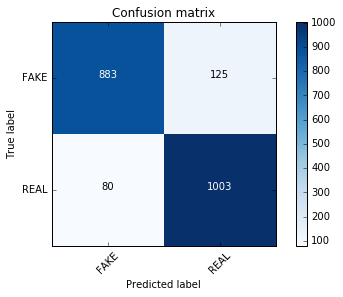

In [76]:
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [77]:
clf = PassiveAggressiveClassifier(n_iter=50)

accuracy:   0.919
Confusion matrix, without normalization


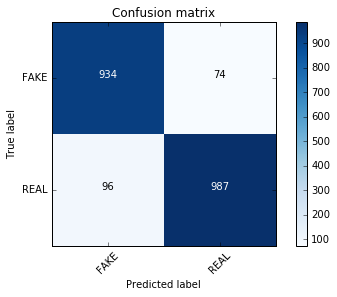

In [78]:
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

Surprisingly, the Hashing vectorizer also gave good results compared to tf-idf with an accuracy of 90%. But it should be noted that in this strategy there is no way to compute the inverse transform (from feature indices to string feature names) which can be a problem when trying to introspect which features are most important to a model. 

### Experimentation using Keras 

Being new to deep learning models, I started out with simple implementations using Keras which is a high level neural network API,written in Python and capable of running on top of TensorFlow, CNTK, or Theano. I downloaded and installed Tensorflow and used it as a backend for this experiment. 
#### Source: https://keras.io/why-use-keras/ 


In [81]:
df_keras = pd.read_csv("C:\\Users\\Prajakta\\fake_or_real_news.csv",encoding='latin-1')
df_keras.head(5)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillaryâs Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"â Kaydee King (@KaydeeKing) November 9, 2016...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [82]:
label = df_keras.label
text = df_keras.text

In [83]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder
import time
from keras import metrics

Using TensorFlow backend.


### Data Preprocessing in Keras

I used LabelEncoder to transform labels FAKE and REAL to convert it to integers

Keras provides Tokenizer() Class for vectorizing texts, or/and turning texts into sequences and I set num_max = 1000  where num_words: None or int. Maximum number of words to work with (if set, tokenization will be restricted to the top num_words most common words in the dataset).

In [84]:
num_max = 1000
# preprocess
le = LabelEncoder()
label = le.fit_transform(label)
tok = Tokenizer(num_words=num_max)
tok.fit_on_texts(text)
mat_text = tok.texts_to_matrix(text,mode='count')
print(label[:5])
print(mat_text[:5])
print(label.shape,mat_text.shape)

[0 0 1 0 1]
[[  0.  93.  34. ...,   0.   0.   1.]
 [  0.  16.  14. ...,   0.   0.   0.]
 [  0.  24.  15. ...,   0.   0.   0.]
 [  0.  25.  14. ...,   0.   0.   0.]
 [  0.  19.  13. ...,   0.   0.   0.]]
(6335,) (6335, 1000)


#### The above results show labels FAKE and REAL as 0 and 1 respectively. 

#### I use a simple model i.e. SEQUENTIAL to start with. I started with 512 neurons in the first layer with an 'relu' activation function followed by 256 neurons and so on. Loss function used is 'binary_crossentropy' and metric as Accuracy. Source: https://keras.io/getting-started/sequential-model-guide/

In [85]:
def get_simple_model():
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(num_max,)))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc',metrics.binary_accuracy])
    print('compile done')
    return model

In [86]:
def check_model(model,x,y):
    model.fit(x,y,batch_size=32,epochs=10,verbose=1,validation_split=0.2)

#### Epoch
It is an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation. I set to 10 which is analogous to ten fold cross validation of data. 

#### Let us run our model over defined text and label.

In [87]:
m = get_simple_model()
check_model(m,mat_text,label)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               512512    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 644,097
Trainable params: 644,097
Non-trainable params: 0
_________________________________________________________________
compile done
Train on 5068 samples, validate on 1267 samples
Epoch 1/10
5068/5068 [==============================] - 8s 2ms/step - loss:

#### Observations: 
We can see that the binary accuracy value at each epoch is close to 93% and a loss of 0.2 using Sequential model. This is the maximum accuracy attained till now that also includes validation of results and thus this model can be taken into consideration with confidence.

One thing to be noted here is the results for acc and val_acc or loss and val_loss are different because I used dropout() that prevents overfitting of the data. It can simply explained as, when dropout is used the model is being trained while the "loss" is being computed, whereas the model is fixed while "val_loss" is being computed. Since the model is training, "loss" is typically going to be larger than the true training set loss at the end of the epoch. I.e. "loss" is the average loss during the epoch, and "val_loss" is the average loss after the end of the epoch. Since the model changes during the epoch, the loss changes. Similar is the case with acc and val_acc

To explore further, I tried other model i.e.
### CNN CONVOLUTIONAL NEURAL NETWORK
model provided in Keras to compare my results with the SEQUENTIAL model. Source: https://keras.io/layers/convolutional/

In [88]:
# Data preprocessing for cnn, set max_len to 100 for this experiment and then we can change further to gather more information
max_len = 100
cnn_texts_seq = tok.texts_to_sequences(text)
print(cnn_texts_seq[0])
cnn_texts_mat = sequence.pad_sequences(cnn_texts_seq,maxlen=max_len)
print(cnn_texts_mat[0])
print(cnn_texts_mat.shape)

[5, 25, 1, 626, 483, 8, 5, 57, 247, 10, 6, 1, 808, 3, 1, 100, 82, 36, 24, 2, 144, 13, 1, 236, 1, 973, 24, 45, 221, 55, 465, 18, 100, 7, 12, 2, 17, 27, 122, 162, 9, 1, 301, 3, 5, 363, 105, 106, 2, 184, 144, 13, 1, 236, 27, 314, 974, 49, 82, 4, 46, 47, 20, 421, 73, 58, 84, 4, 31, 3, 410, 28, 40, 42, 7, 236, 446, 928, 704, 8, 6, 18, 100, 1, 236, 8, 187, 303, 19, 646, 28, 81, 2, 410, 47, 20, 5, 900, 704, 59, 16, 41, 153, 902, 88, 63, 29, 12, 17, 215, 48, 1, 37, 40, 919, 51, 2, 548, 414, 303, 103, 1, 236, 1, 834, 8, 118, 7, 1, 677, 244, 472, 34, 929, 5, 48, 30, 461, 113, 71, 82, 4, 1, 8, 118, 19, 1, 153, 4, 1, 190, 2, 648, 179, 1, 625, 3, 1, 360, 3, 1, 36, 539, 4, 82, 36, 1, 174, 236, 4, 705, 47, 24, 168, 1, 57, 247, 231, 24, 704, 2, 77, 704, 600, 236, 37, 58, 484, 7, 122, 1, 24, 814, 5, 796, 9, 22, 2, 17, 78, 24, 31, 7, 1, 8, 242, 31, 303, 10, 43, 234, 928, 999, 10, 2, 646, 7, 14, 15, 162, 4, 14, 704, 3, 13, 111, 154, 4, 1, 4, 38, 599, 1, 135, 15, 5, 153, 704, 13, 72, 38, 145, 5, 296, 10, 

In [89]:
def get_cnn_model():   
    model = Sequential()
    # Lets start off with an efficient embedding layer that requires that the input data be integer encoded which
    # maps our vocab indices into embedding_dims dimensions
    # 1000 is num_max
    model.add(Embedding(1000,
                        20,
                        input_length=max_len))
    model.add(Dropout(0.2))
    model.add(Conv1D(64,
                     3,
                     padding='valid',
                     activation='relu',
                     strides=1))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(256))
    model.add(Dropout(0.2))
    model.add(Activation('relu'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.summary()
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['acc',metrics.binary_accuracy])
    return model

m = get_cnn_model()
check_model(m,cnn_texts_mat,label)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 20)           20000     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100, 20)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 98, 64)            3904      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               16640     
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
__________

#### Keeping epoch as 10, we get an accuracy of 84% which is the lowest of all and a loss of 0.3 which is more than the previous experiment.  

The above experiments helped me to get an insight over multiple approaches that can be followed to explore the data especially textual data and derive interesting results out of it. This small experiment has given me a headstart to learn neural networks and I am sure to take this streak to develop some interesting application as a part of my research. 